In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('C:\\Users\\Sakib\\Desktop\\New_folder\\stinson_insurance.csv')

In [3]:
df.head()

,id,age,gender,race,driving_experience,education,income,credit_score,vehicle_ownership,vehicle_year,married,children,postal_code,annual_mileage,vehicle_type,speeding_violations,DUIs,past_accidents,outcome
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,True,after 2015,False,True,10238,12000.0,sedan,0,0,0,False
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,False,before 2015,False,False,10238,16000.0,sedan,0,0,0,True
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,True,before 2015,False,False,10238,11000.0,sedan,0,0,0,False
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,True,before 2015,False,True,32765,11000.0,sedan,0,0,0,False
4,731664,26-39,male,majority,10-19y,none,working class,0.388366,True,before 2015,False,False,32765,12000.0,sedan,2,0,1,True


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   10000 non-null  int64  
 1   age                  10000 non-null  object 
 2   gender               10000 non-null  object 
 3   race                 10000 non-null  object 
 4   driving_experience   10000 non-null  object 
 5   education            10000 non-null  object 
 6   income               10000 non-null  object 
 7   credit_score         9018 non-null   float64
 8   vehicle_ownership    10000 non-null  bool   
 9   vehicle_year         10000 non-null  object 
 10  married              10000 non-null  bool   
 11  children             10000 non-null  bool   
 12  postal_code          10000 non-null  int64  
 13  annual_mileage       9043 non-null   float64
 14  vehicle_type         10000 non-null  object 
 15  speeding_violations  10000 non-null  

In [5]:
df.describe()

,id,credit_score,postal_code,annual_mileage,speeding_violations,DUIs,past_accidents
count,10000.000000,9018.000000,10000.000000,9043.000000,10000.000000,10000.00000,10000.000000
mean,500521.906800,0.515813,19864.548400,11697.003207,1.482900,0.23920,1.056300
std,290030.768758,0.137688,18915.613855,2818.434528,2.241966,0.55499,1.652454
min,101.000000,0.053358,10238.000000,2000.000000,0.000000,0.00000,0.000000
25%,249638.500000,0.417191,10238.000000,10000.000000,0.000000,0.00000,0.000000
50%,501777.000000,0.525033,10238.000000,12000.000000,0.000000,0.00000,0.000000
75%,753974.500000,0.618312,32765.000000,14000.000000,2.000000,0.00000,2.000000
max,999976.000000,0.960819,92101.000000,22000.000000,22.000000,6.00000,15.000000


***Exploring the Data****

In [6]:
##Checking skewness in dataset
from scipy.stats import skew

id -0.011317855004738102


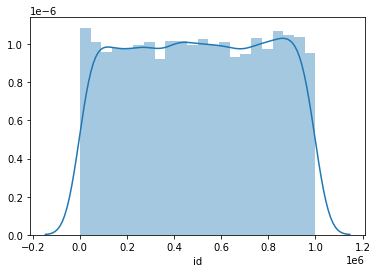

credit_score nan


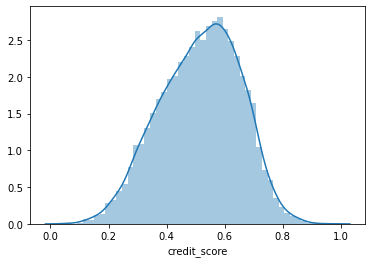

vehicle_ownership -0.8573507231924032


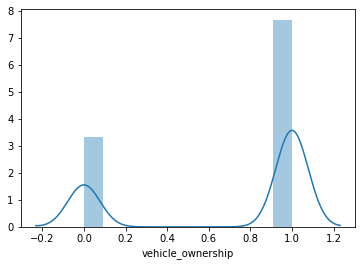

married 0.007200046656453782


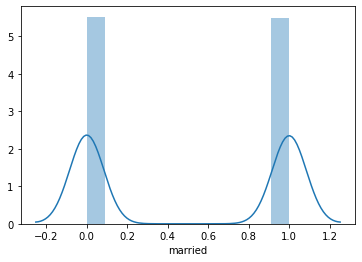

children -0.8155782252748877


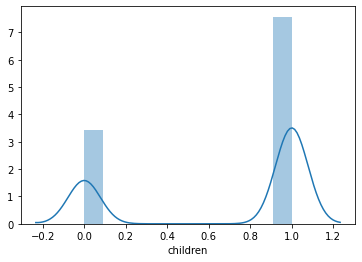

postal_code 2.6824245002930094


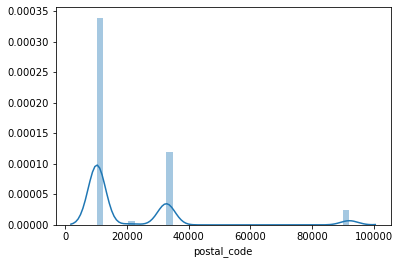

annual_mileage nan


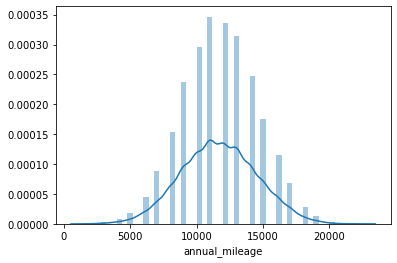

speeding_violations 2.3651045985758894


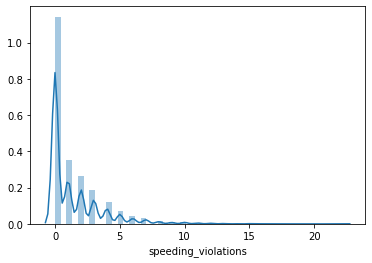

DUIs 2.7574718966502405


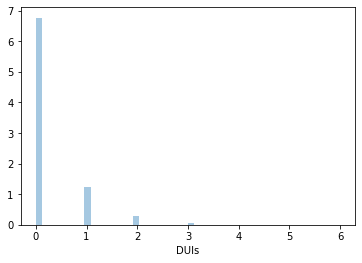

past_accidents 2.148626410339331


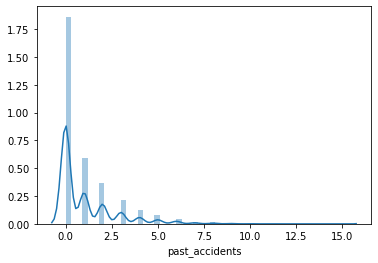

outcome 0.8050272705443443


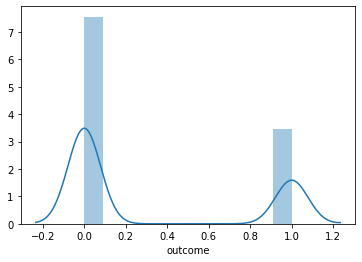

In [7]:
for col in df:
    if df[col].dtypes != 'O':
        print(col,skew(df[col]))
        plt.figure()
        sns.distplot(df[col])
        plt.show()
        

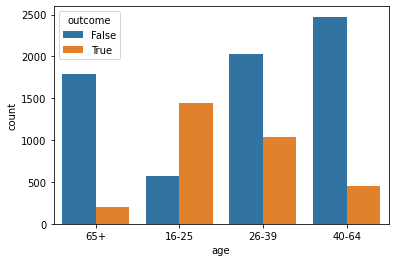

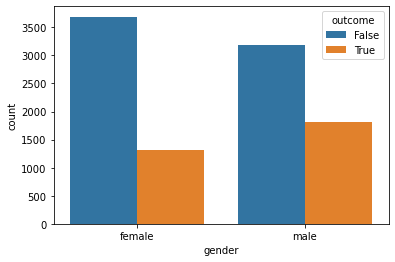

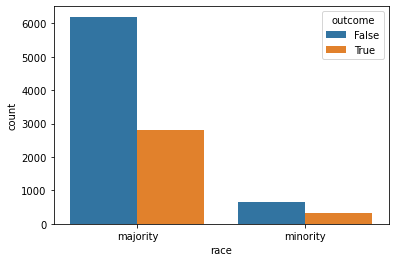

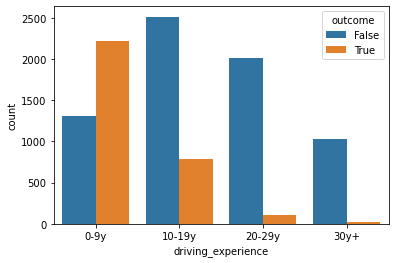

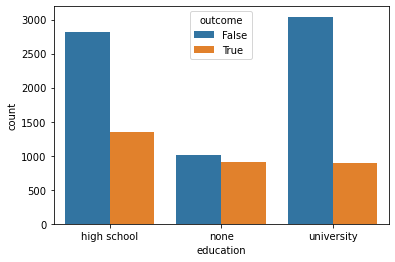

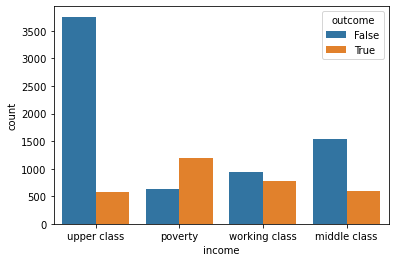

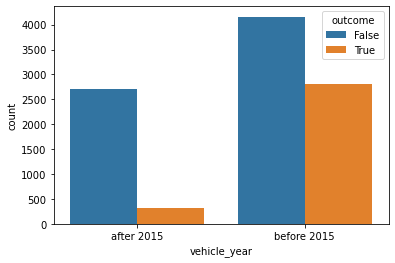

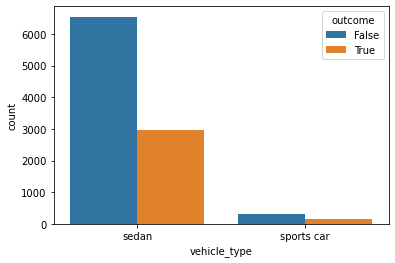

In [8]:
for col in df:
    if df[col].dtypes == 'O':
        plt.figure()
        sns.countplot(df[col],hue=df['outcome'])
        plt.show()

# Featurewise count Analysis of customers have status claims.





* The group of Customers within age range 16 to 25 years have claimed most number of time than other age range. Around 2000
  customers belongs to this age range and out of them 71% of customers have claimed status. This proportional is 14% if entire   dataset is considered.
  
* If gender feature is concern then males have claimed more than feamales.

* In case of race, 90% of the customer are from majority groups and 31% of them have claimed before while goup minority customers are only 10% of total customers and 32% out of them have claimed. 

* One of the most important feature is driving experince of customers. The customers have experince from 0 to 9 years occupies 
  35% portion of dataset and claims happend more frequently by this group. Out of all the customers who claimed 22% population 
  belong to this range of driving experince
  
* Among all 70% of customer using the vehicles before Year 2015. 40% out of this group have claimed status. 

* 95% customer drive sedan and remaining 5% have sports cars. 29% of sedan drivers claimed and 1% of sports cars drivers.

***finding the answers for given questions

In [9]:
#Que 1: What proportion of customers with credit scores lower than 0.2 made the claim last year ? 

In [10]:
df.loc[df['credit_score'] < 0.2]

,id,age,gender,race,driving_experience,education,income,credit_score,vehicle_ownership,vehicle_year,married,children,postal_code,annual_mileage,vehicle_type,speeding_violations,DUIs,past_accidents,outcome
32,496987,16-25,male,majority,0-9y,none,poverty,0.171244,True,before 2015,True,True,10238,9000.0,sedan,0,0,0,False
187,431538,16-25,male,majority,0-9y,high school,poverty,0.194150,False,before 2015,True,False,10238,12000.0,sports car,0,0,0,True
210,112143,16-25,female,majority,0-9y,none,working class,0.192427,False,before 2015,False,True,32765,11000.0,sedan,0,0,0,True
279,124204,16-25,female,majority,0-9y,none,poverty,0.186185,False,before 2015,False,False,10238,17000.0,sedan,0,0,0,True
294,232470,16-25,male,majority,0-9y,university,poverty,0.126453,True,before 2015,False,True,10238,14000.0,sedan,0,0,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9648,41325,40-64,male,majority,20-29y,high school,poverty,0.115402,False,before 2015,False,False,32765,16000.0,sedan,2,0,0,True
9661,968926,16-25,male,majority,0-9y,high school,poverty,0.150101,True,before 2015,False,False,10238,16000.0,sedan,0,0,0,False
9687,981972,16-25,male,minority,0-9y,high school,poverty,0.125896,False,after 2015,False,False,32765,14000.0,sedan,0,0,0,False
9695,738707,16-25,male,majority,0-9y,high school,poverty,0.160785,True,before 2015,False,False,32765,9000.0,sedan,0,0,0,True


In [11]:
df_1 = df.loc[(df['credit_score'] < 0.2) & (df['outcome'] == True)] 

In [12]:
df_1.head()

,id,age,gender,race,driving_experience,education,income,credit_score,vehicle_ownership,vehicle_year,married,children,postal_code,annual_mileage,vehicle_type,speeding_violations,DUIs,past_accidents,outcome
187,431538,16-25,male,majority,0-9y,high school,poverty,0.194150,False,before 2015,True,False,10238,12000.0,sports car,0,0,0,True
210,112143,16-25,female,majority,0-9y,none,working class,0.192427,False,before 2015,False,True,32765,11000.0,sedan,0,0,0,True
279,124204,16-25,female,majority,0-9y,none,poverty,0.186185,False,before 2015,False,False,10238,17000.0,sedan,0,0,0,True
294,232470,16-25,male,majority,0-9y,university,poverty,0.126453,True,before 2015,False,True,10238,14000.0,sedan,0,0,0,True
880,66528,26-39,male,minority,10-19y,none,poverty,0.190250,False,before 2015,False,True,10238,11000.0,sedan,0,0,1,True


In [13]:
poc = len(df_1) /len(df) * 100

print(f'Among all customers in dataset, {poc}% of customers have credit score lower than 0.2 and thay made the claim.')

Among all customers in dataset, 0.59% of customers have credit score lower than 0.2 and thay made the claim.


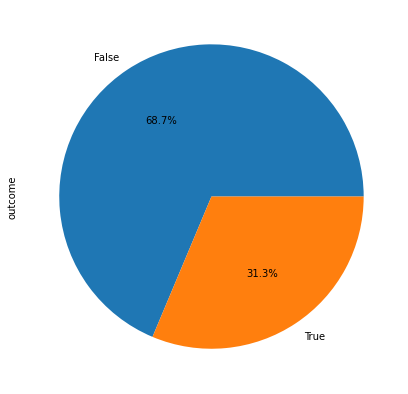

In [14]:
plt.figure(figsize=(7,7))
df['credit_score'] = df['credit_score'] < 0.2
df['outcome'].value_counts().plot.pie(autopct="%.1f%%")
plt.show()

* We have 10,000 records for all the customers in dataset and total 98 customers have credit score lower than 0.2
* The pie plot represent all the customers with credit score lower than 0.2. 
* In this specific group the portion of customer who claims is 31% out of all.

In [15]:
#Que 2: What is the Average number of speeding violations among the customers driving experience between 20-29 years ? 

In [16]:
Avrg_vio = (df.groupby('driving_experience', as_index=False)['speeding_violations'].mean()).nlargest(4,'speeding_violations')

In [17]:
Avrg_vio

,driving_experience,speeding_violations
3,30y+,4.460076
2,20-29y,2.734309
1,10-19y,1.316460
0,0-9y,0.000000


Text(0, 0.5, 'Speeding_violation')

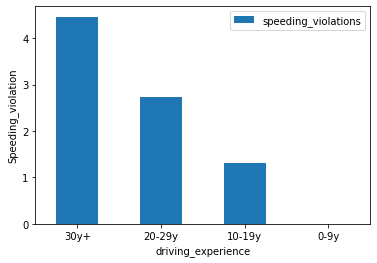

In [18]:
Avrg_vio.plot.bar(x='driving_experience', y='speeding_violations',rot=0)
plt.ylabel('Speeding_violation')

* To find out the Avarage number of speeding violation attempted by the customer who have experience of driving from 20 to 29     years.
* we taking the most frequent number appears in this violation column. In other words finding the median of the violations       feature. 
* The avarage number for speeding violation is 2 for this specific group and the impact can be seen on the percentage  of         customers in this group who claimed. Its small number like 1% customers of this group claimed insurnce.
* maximum number of violation occurred via this groups customers is 17 and minimum time is 0.

In [19]:
#Que 3: What if you consider only the people in this group who drive a sports car ?

We perform analysis here in two ways : 

1) In Entire dataset of the customers, around 5% customers drive sports cars.and Avarage number of speeding violation is 
   1, which is higher than the avarage speeding violation done by group drive sedan cars.

In [20]:
#Average speeding violation of the customers with sports cars and claimed status

df[(df['vehicle_type'] == 'sports car') & (df['outcome'] == True)]['speeding_violations'].median()

0.0

In [21]:
#Averahe speeding violation of the customers with sports cars and Not claimed status

df[(df['vehicle_type'] == 'sports car') & (df['outcome'] == False)]['speeding_violations'].median()

1.0

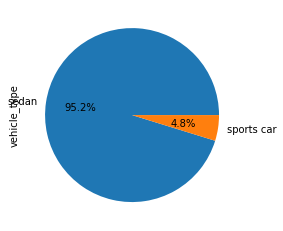

In [22]:
#Percentage of sports car drives in entire dataset 

df['vehicle_type'].value_counts().plot.pie(autopct='%.1f%%')

In [23]:
#2) Analysis within group has driving experinece from 20 to 29 years

In [24]:
df1 = df[df['driving_experience'] == '20-29y']

In [25]:
per_sp = len(df1[df1['vehicle_type'] == 'sports car']) / len(df1) * 100

print(f"In group of customers having driving experince from 20-29 years,{int(per_sp)}% customers have sports cars")

In group of customers having driving experince from 20-29 years,4% customers have sports cars


In [26]:
df1[df1['vehicle_type'] == 'sports car']['speeding_violations'].median()

print(f"The avarage No of speeding violatons done by Sport cars drivers is {int(df1[df1['vehicle_type'] == 'sports car']['speeding_violations'].median())}")

The avarage No of speeding violatons done by Sport cars drivers is 2


In [27]:
##percentage of customer who have sports cars and claims status True.

len(df[(df['vehicle_type'] == 'sports car') & (df1['outcome'] == True)]) / len(df[df['vehicle_type'] == 'sports car']) * 100

1.257861635220126

In [28]:
#Averahe speeding violation of the customers with sports cars and claimed status

df1[(df1['vehicle_type'] == 'sports car') & (df1['outcome'] == True)]['speeding_violations'].median()

1.0

In [29]:
#Averahe speeding violation of the customers with sports cars and Not claimed status

df1[(df1['vehicle_type'] == 'sports car') & (df1['outcome'] == False)]['speeding_violations'].median()

2.0

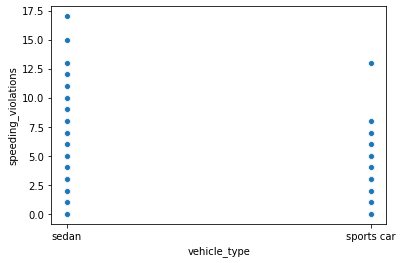

In [30]:
sns.scatterplot(df1['vehicle_type'],df1['speeding_violations'])

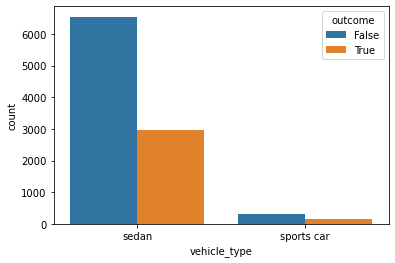

In [31]:
sns.countplot(df['vehicle_type'],hue=df['outcome'])

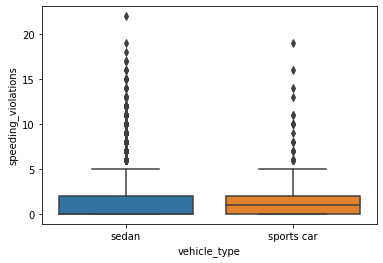

In [32]:
sns.boxplot(data= df,x='vehicle_type',y='speeding_violations')

**Summery**

1) Amoung 10,000 customers, around 5% customers drive sports cars. 
2) the avarage speeding violation done by sports cars drivers and non-sport cars drivers almost same    that is 0.
3) A big diffrence can be spot in both above groups taking claim percenatge in concern. Out of all      sports car drives 32% of claimed and out of all non-sport car drives 30% of them claimed              insurance. in compare with non-sport driving customer the sport car drives claims more often. 

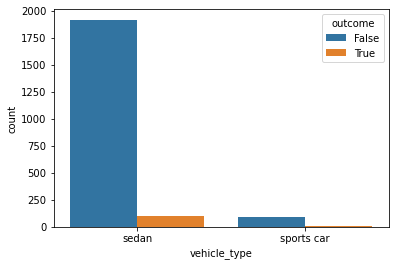

In [33]:
sns.countplot(df1['vehicle_type'],hue=df1['outcome'])

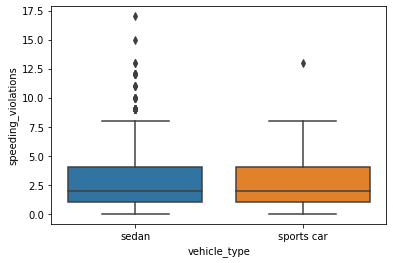

In [34]:
sns.boxplot(data= df1,x='vehicle_type',y='speeding_violations')

**group have 20-29 years of driving experince

1) In this specific group, around 4% customers drives sports car. 
2) In the specific group, Average speeding violation appears same as 2 for both sports and non-sport car drivers.
3) In this specific goup the claims static is diffrent than rest of the dataset, In this group customers with non-sport
   cars have claimed more number of times than thos having sport cars. 

In [35]:
#Que:4 What is standard deviation in annual mileage ?

In [36]:
#Note : feature annual mileage has rows with missing data. That should be dealth with while fitting the data to model. 

df['annual_mileage'].describe()

count     9043.000000
mean     11697.003207
std       2818.434528
min       2000.000000
25%      10000.000000
50%      12000.000000
75%      14000.000000
max      22000.000000
Name: annual_mileage, dtype: float64

In [37]:
a = np.std(df['annual_mileage'])

In [38]:
print(f'Standard Deviation of feature annual mileage is {round(a)}')

Standard Deviation of feature annual mileage is 2818


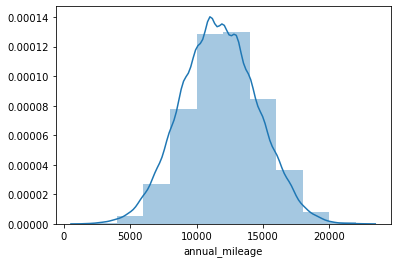

In [39]:
sns.distplot(df['annual_mileage'],bins=10,kde=True)

The column annual mileage distribution of value is almost normally distributed before filling the missing values. 
Afterward filling the missing data the static of distribution might change while serving data to model. 

**Finding the other patterns in the data**

In [40]:
#3. How does the number of claims vary between postcodes? 

In [41]:
df['outcome'] = df['outcome'].replace((True),int(1))
df['outcome'] = df['outcome'].replace((False),int(0))

In [42]:
df.outcome = df.outcome.astype('int64')

In [43]:
df.postal_code.value_counts()

10238    6940
32765    2456
92101     484
21217     120
Name: postal_code, dtype: int64

In [44]:
df_x = df[ (df['postal_code'] == 10238) & (df['outcome'] == 1) ]

df_y =  df[df['outcome'] == 1 ]

len(df_x) / len(df_y) * 100

print(f'Portion of claiming customers from post code 10238 is {int(len(df_x) / len(df_y) * 100)}% out of all claiming customers\nThis maximum claiming percentage from any postcode area')

Portion of claiming customers from post code 10238 is 60% out of all claiming customers
This maximum claiming percentage from any postcode area


In [45]:
df_z = df[ (df['postal_code'] == 21217) & (df['outcome'] == 1) ]

len(df_z) / len(df_y) * 100

print(f'Portion of claiming customers from post code 21217 is {int(len(df_z) / len(df_y) * 100)}% out of all claiming customers\nThis minimum claiming percentage from any postcode area')

Portion of claiming customers from post code 21217 is 3% out of all claiming customers
This minimum claiming percentage from any postcode area


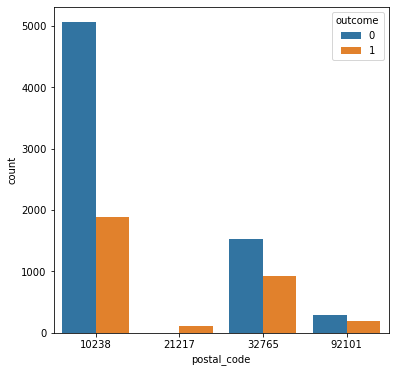

In [46]:
##Percentage of claiming customers on diffrent postal codes

plt.figure(figsize=(6,6))
sns.countplot('postal_code',hue='outcome',data=df)

In [47]:
#A clear diffrence can be splot when we compare postal code 10238 with other postal code with feature married. 

In [48]:
df[ (df['postal_code'] == 10238)]['married'].mode()

0    False
dtype: bool

In [49]:
df[df['postal_code'] != 10238 ]['married'].mode()

0    True
dtype: bool

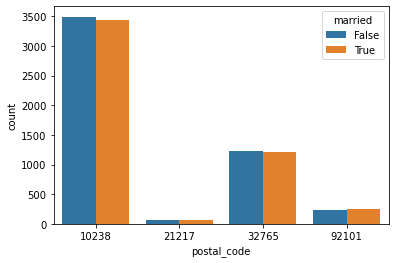

In [50]:
sns.countplot('postal_code',hue='married',data=df)

In [51]:
# Out of total No. of customers 30% of customer made claim.
# Now we check what portion out of that resides at postal code 10238

df1 = df[df['outcome'] == 1 ]

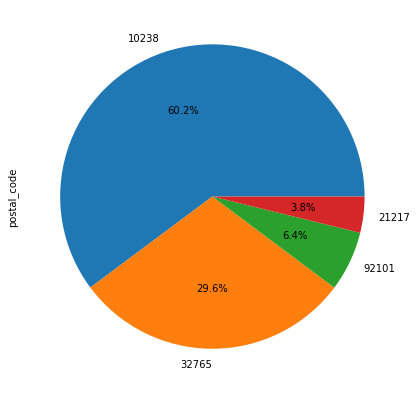

In [52]:
plt.figure(figsize=(7,7))
df1.postal_code.value_counts().plot.pie(autopct="%.1f%%")

1) Maximum number of claims has been made from postal code 10238 around 60% of all claims. 

2) Minimum number of claims has been made from postal code 21217 around 4% of all claims. 

In [53]:
#Que : 2 What do claimants have in common ?

In [54]:
df_comm = df[df['outcome'] == 1]

In [55]:
df_comm.head()

,id,age,gender,race,driving_experience,education,income,credit_score,vehicle_ownership,vehicle_year,married,children,postal_code,annual_mileage,vehicle_type,speeding_violations,DUIs,past_accidents,outcome
1,750365,16-25,male,majority,0-9y,none,poverty,False,False,before 2015,False,False,10238,16000.0,sedan,0,0,0,1
4,731664,26-39,male,majority,10-19y,none,working class,False,True,before 2015,False,False,32765,12000.0,sedan,2,0,1,1
7,461006,26-39,female,majority,0-9y,university,working class,False,False,after 2015,False,True,10238,14000.0,sedan,0,0,0,1
9,445911,40-64,female,majority,0-9y,high school,upper class,False,True,before 2015,False,True,32765,11000.0,sedan,0,0,0,1
17,24851,16-25,male,majority,0-9y,none,poverty,False,False,before 2015,True,False,32765,12000.0,sedan,0,0,0,1


Analysing this data featurewise so we can find some common properties between features. 

male      1812
female    1321
Name: gender, dtype: int64

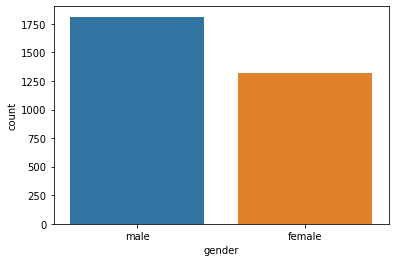

In [56]:
sns.countplot(df_comm['gender'])
df_comm['gender'].value_counts()

0-9y      2217
10-19y     787
20-29y     109
30y+        20
Name: driving_experience, dtype: int64

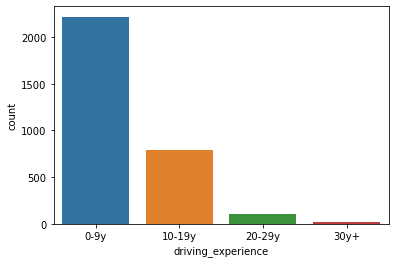

In [57]:
sns.countplot(df_comm['driving_experience'])
df_comm['driving_experience'].value_counts()

False    1757
True     1376
Name: vehicle_ownership, dtype: int64

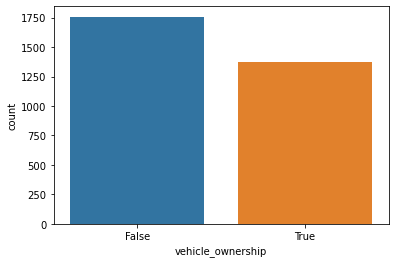

In [58]:
sns.countplot(df_comm['vehicle_ownership'])
df_comm['vehicle_ownership'].value_counts()

before 2015    2810
after 2015      323
Name: vehicle_year, dtype: int64

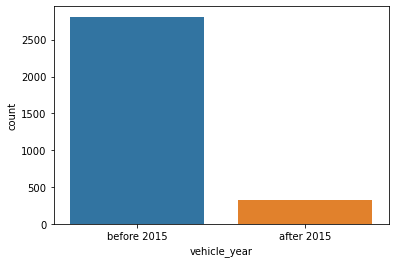

In [59]:
sns.countplot(df_comm['vehicle_year'])
df_comm['vehicle_year'].value_counts()

high school    1344
none            903
university      886
Name: education, dtype: int64

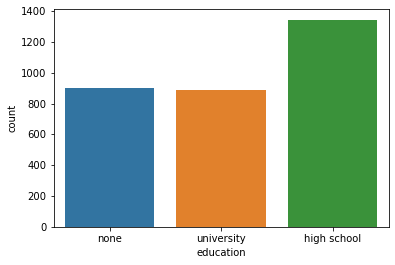

In [60]:
sns.countplot(df_comm['education'])
df_comm['education'].value_counts()

16-25    1448
26-39    1032
40-64     457
65+       196
Name: age, dtype: int64

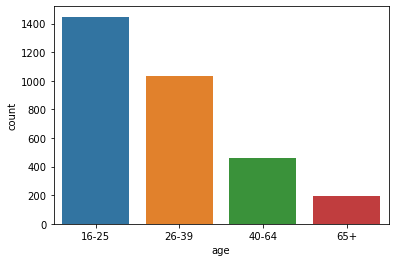

In [61]:
sns.countplot(df_comm['age'])
df_comm['age'].value_counts()

poverty          1186
working class     776
middle class      592
upper class       579
Name: income, dtype: int64

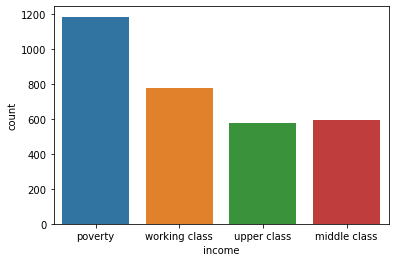

In [62]:
sns.countplot(df_comm['income'])
df_comm['income'].value_counts()

**SUMMERY**

1. First we have extracted the data of only those customers who made the claim. 
2. There are few common or frequent patterns can be detected in fetched dataset columnswised.
3. Around 60% of the claiming customers are male.
4. Portion of customers with driving experience 0-9 year are noticebale here. 75% of claims are made from the same group. 
5. About the vehicle ownership, frequent claiming customers were not using the own vehicles. This portion is around 58% of        percent. 
6. one of the most common observation made on the year of vehicle, Almost all or in numbers more 90% claiming customers using      the vehicle that purchase before year 2015
7. There are three classes in education within claiming customers , no education , University level and high school. 
   Customer educated till high school level made the claim most number of times. 40% claiming customers have completed high        school level.
8. In claiming customers, from 16 to 25 year this range is much more common. 
9. A clear observation can be detect via income class, customer belong to poverty class made 40% portion of claming people. 
   and minmum no. of time claims made by upper class with around 18%.

In [63]:
#Que:1 Are there any perticular customer type

In [64]:
#Will check the pattern by reference of outcome, weather that type/group make claim or not


df_comm = df[df['outcome'] == 1]

len(df_comm)

3133

In [65]:
non_claimers = df[(df['gender'] == 'female') & (df['age'] == '65+') & (df['education'] == 'none') & (df['married'] == True) & (df['children'] == True) ]

In [66]:
len(non_claimers)

48

In [67]:
non_claimers[non_claimers['outcome'] == 1]

,id,age,gender,race,driving_experience,education,income,credit_score,vehicle_ownership,vehicle_year,married,children,postal_code,annual_mileage,vehicle_type,speeding_violations,DUIs,past_accidents,outcome
7771,71379,65+,female,minority,0-9y,none,upper class,False,True,before 2015,True,True,32765,8000.0,sedan,0,0,0,1
8749,91470,65+,female,minority,0-9y,none,working class,False,False,before 2015,True,True,10238,9000.0,sedan,0,0,0,1


In [68]:
a = int(len(non_claimers[non_claimers['outcome'] == 1]) / len(non_claimers) * 100)
print(f'Only {a}% of customer claims who belongs to this type.')

Only 4% of customer claims who belongs to this type.


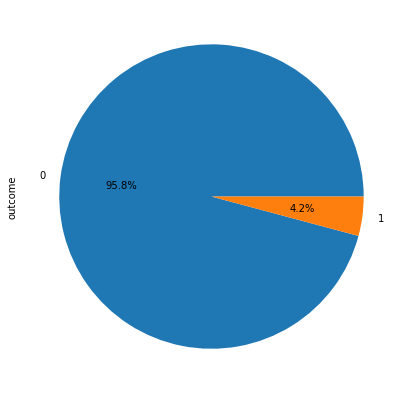

In [69]:
plt.figure(figsize=(7,7,))
non_claimers.outcome.value_counts().plot.pie(autopct='%.1f%%')

**Intuitivly,following the features and there unique properties, a specific group of customer can be found in data.
**name non-claimers as above. These group of customers are females ages from range 39 to 65+ married with children.
**Amoung entire dataset, 0.4% customers belongs to same type and only 4% out of them have claimed. 

In [70]:
non_claimers2 = df.loc[(df['income'] == 'upper class') & (df['speeding_violations'] > 8) & (df['gender'] == 'male')]

In [71]:
non_claimers2[non_claimers2['outcome'] == 1]

,id,age,gender,race,driving_experience,education,income,credit_score,vehicle_ownership,vehicle_year,married,children,postal_code,annual_mileage,vehicle_type,speeding_violations,DUIs,past_accidents,outcome
3603,576674,40-64,male,minority,10-19y,university,upper class,False,True,before 2015,True,True,32765,5000.0,sedan,10,0,2,1
5187,218063,65+,male,majority,30y+,university,upper class,False,True,before 2015,True,True,32765,9000.0,sedan,10,1,3,1
5272,268143,65+,male,majority,30y+,university,upper class,False,True,before 2015,True,False,32765,12000.0,sedan,11,1,1,1
5982,277264,65+,male,majority,10-19y,university,upper class,False,True,before 2015,True,True,32765,9000.0,sedan,10,0,2,1
6741,779801,40-64,male,minority,20-29y,university,upper class,False,False,before 2015,True,True,32765,8000.0,sedan,9,1,2,1
7842,992127,40-64,male,majority,20-29y,university,upper class,False,True,before 2015,False,False,32765,12000.0,sedan,10,4,2,1
8050,869862,40-64,male,majority,20-29y,high school,upper class,False,False,before 2015,True,True,32765,6000.0,sedan,11,1,2,1
8668,182495,65+,male,majority,20-29y,university,upper class,False,True,before 2015,True,True,32765,8000.0,sedan,9,1,4,1
9391,2698,40-64,male,majority,20-29y,university,upper class,False,True,before 2015,False,True,32765,7000.0,sedan,11,0,2,1


In [72]:
len(non_claimers2)

137

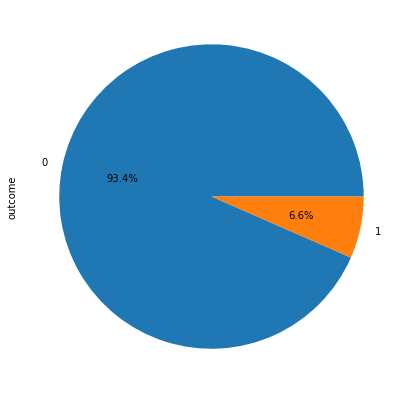

In [73]:
plt.figure(figsize=(7,7))
non_claimers2['outcome'].value_counts().plot.pie(autopct='%.1f%%')

**The other group of customer names as non-claimers2. 
**These customers are males with income status upper class and attempted speeding violations 10 or more times. 
**Around 1.5% of customers belong to the same group. 
** The 

In [74]:
claimers = df[(df['gender'] == 'male') & (df['education'] == 'high school')  & (df['income'] == 'poverty') & (df['vehicle_ownership'] == False) & (df['vehicle_year'] == 'before 2015')] 

In [75]:
len(claimers)

200

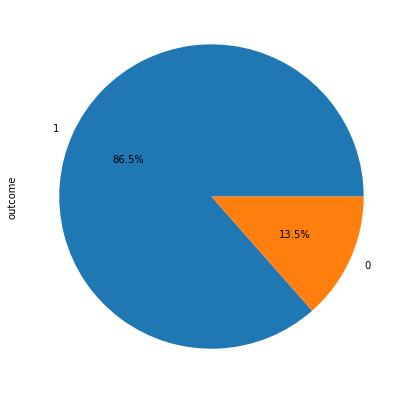

In [76]:
plt.figure(figsize=(7,7,))
claimers.outcome.value_counts().plot.pie(autopct='%.1f%%')

*The third type of the customers,they here frequent in making claims hence names claimers. *This group contributes around 2% of the population in entire dataset. *A large portion that is up to 86% of customers of this group made the claims. *The patter this customer follows could be useful in predicting the upcoming customers outcome.

In [77]:
##Other finding in dataset

In [78]:
Claim_mean = (df.groupby('speeding_violations', as_index=False)['outcome'].mean())

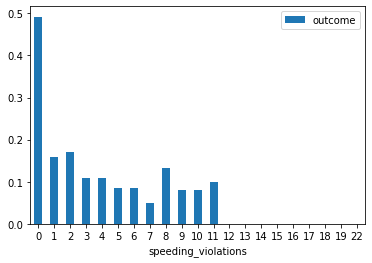

In [79]:
ax = Claim_mean.plot.bar(x='speeding_violations', y='outcome', rot=0)

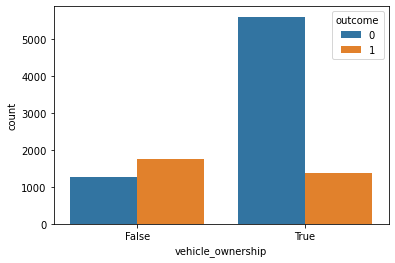

In [80]:
sns.countplot(df['vehicle_ownership'],hue=df['outcome'])

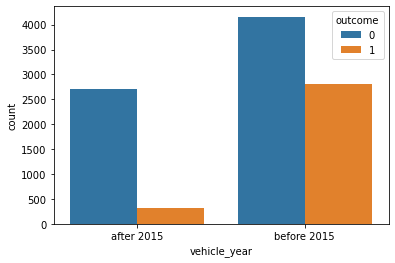

In [81]:
sns.countplot(df['vehicle_year'],hue=df['outcome'])

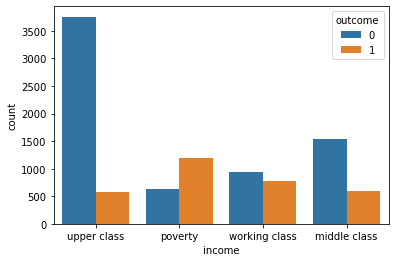

In [82]:
sns.countplot(df['income'],hue=df['outcome'])

In [83]:
df_01 = df[['driving_experience','income','credit_score','vehicle_year','postal_code','annual_mileage','outcome']]

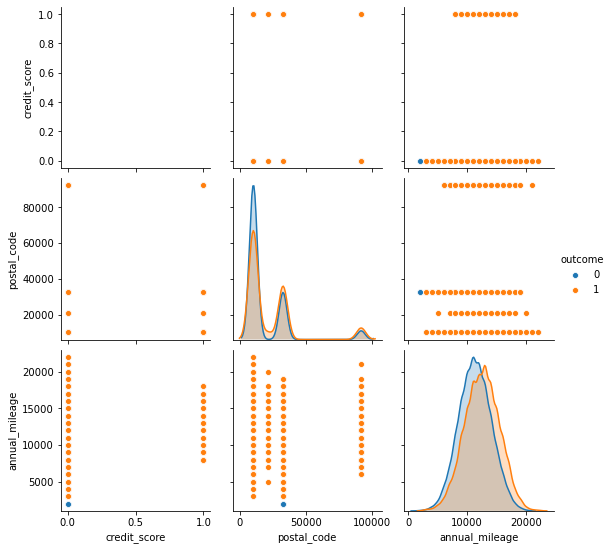

In [84]:
sns.pairplot(df_01,hue='outcome')

** Data preprocessing and cleaning

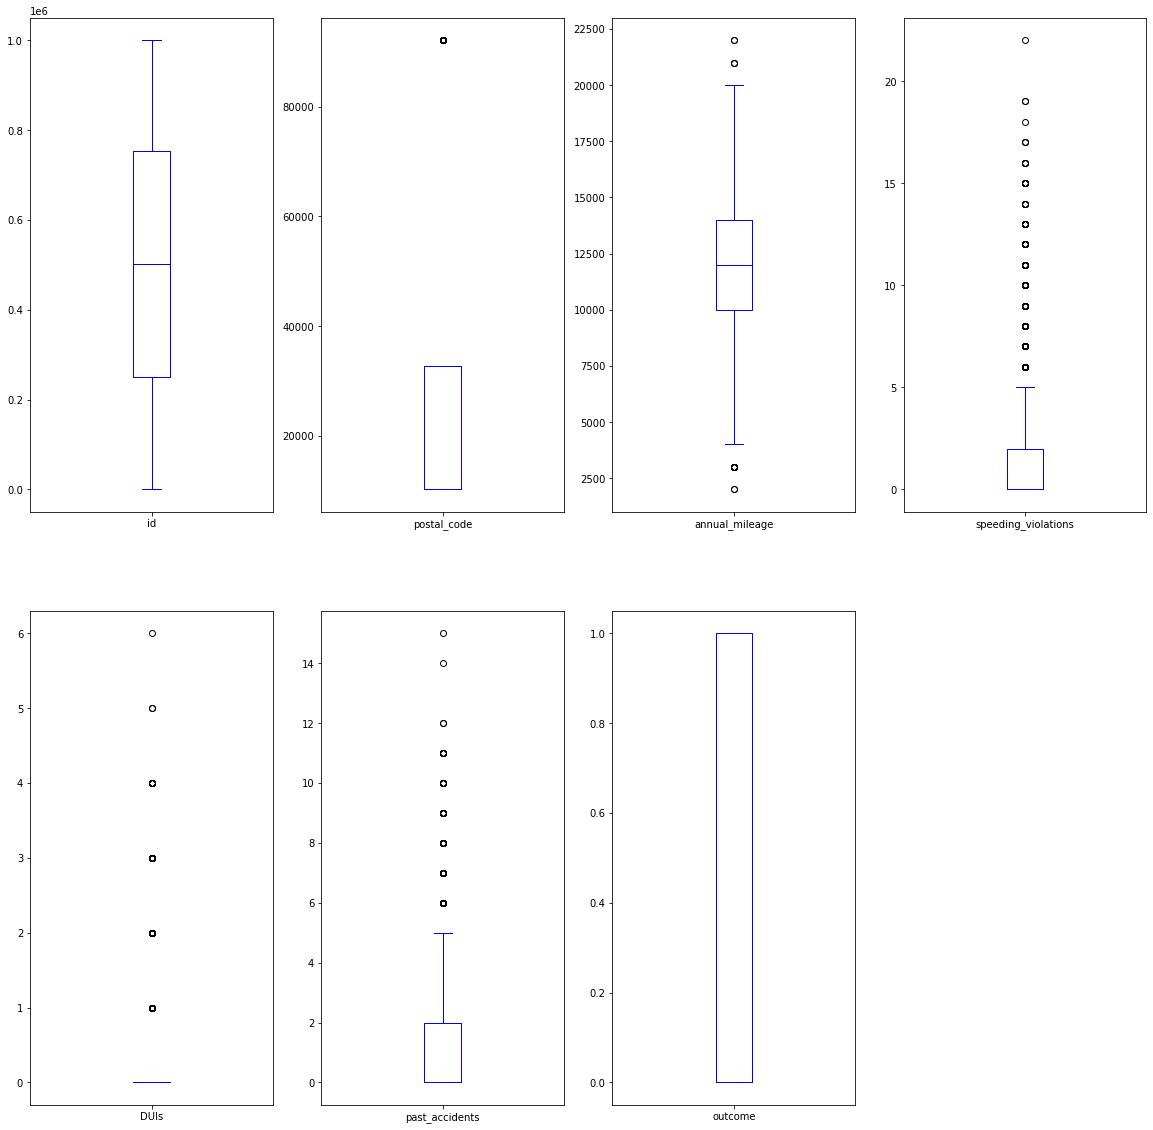

In [85]:
##Checking for outliers in the features

df.plot(kind='box', subplots=True, layout=(2,4), sharex=False, sharey=False, figsize=(20,20),color='blue')
plt.show()

In [86]:
###Features credit_score and annual mileage have missing values.
### We fill up those values using the Iterative imputer

In [87]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [88]:
##Separte the data into two categories 1) Numerical and 2) catagorical data

In [89]:
df_num = df.select_dtypes(exclude=object)
df_num

,id,credit_score,vehicle_ownership,married,children,postal_code,annual_mileage,speeding_violations,DUIs,past_accidents,outcome
0,569520,False,True,False,True,10238,12000.0,0,0,0,0
1,750365,False,False,False,False,10238,16000.0,0,0,0,1
2,199901,False,True,False,False,10238,11000.0,0,0,0,0
3,478866,False,True,False,True,32765,11000.0,0,0,0,0
4,731664,False,True,False,False,32765,12000.0,2,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
9995,323164,False,True,False,False,10238,16000.0,0,0,1,0
9996,910346,False,True,False,True,32765,NaN,1,0,0,0
9997,468409,False,True,False,True,10238,14000.0,0,0,0,0
9998,903459,False,False,False,True,10238,13000.0,2,0,1,1


In [90]:
ITM = IterativeImputer()
ITM.fit(df_num)

IterativeImputer()

In [91]:
df_num = pd.DataFrame(ITM.transform(df_num))

In [92]:
df_ = df.select_dtypes(exclude=object)
df_num.columns = df_.columns

In [93]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   10000 non-null  float64
 1   credit_score         10000 non-null  float64
 2   vehicle_ownership    10000 non-null  float64
 3   married              10000 non-null  float64
 4   children             10000 non-null  float64
 5   postal_code          10000 non-null  float64
 6   annual_mileage       10000 non-null  float64
 7   speeding_violations  10000 non-null  float64
 8   DUIs                 10000 non-null  float64
 9   past_accidents       10000 non-null  float64
 10  outcome              10000 non-null  float64
dtypes: float64(11)
memory usage: 859.5 KB


In [94]:
df_cat = df.select_dtypes(object)

In [95]:
df_cat

,age,gender,race,driving_experience,education,income,vehicle_year,vehicle_type
0,65+,female,majority,0-9y,high school,upper class,after 2015,sedan
1,16-25,male,majority,0-9y,none,poverty,before 2015,sedan
2,16-25,female,majority,0-9y,high school,working class,before 2015,sedan
3,16-25,male,majority,0-9y,university,working class,before 2015,sedan
4,26-39,male,majority,10-19y,none,working class,before 2015,sedan
...,...,...,...,...,...,...,...,...
9995,26-39,female,majority,10-19y,university,upper class,before 2015,sedan
9996,26-39,female,majority,10-19y,none,middle class,after 2015,sedan
9997,26-39,male,majority,0-9y,high school,middle class,before 2015,sedan
9998,26-39,female,majority,10-19y,high school,poverty,before 2015,sedan


In [96]:
##Encoding the categorical data

In [97]:
from sklearn.preprocessing import LabelEncoder

In [98]:
encoder =  LabelEncoder()

In [99]:
for col in df_cat:
    df_cat[col] = encoder.fit_transform(df_cat[col])

In [100]:
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   age                 10000 non-null  int32
 1   gender              10000 non-null  int32
 2   race                10000 non-null  int32
 3   driving_experience  10000 non-null  int32
 4   education           10000 non-null  int32
 5   income              10000 non-null  int32
 6   vehicle_year        10000 non-null  int32
 7   vehicle_type        10000 non-null  int32
dtypes: int32(8)
memory usage: 312.6 KB


In [101]:
##Post encoding we merge both the numerical and categorical dataset together

df_new = pd.concat([df_num,df_cat],axis=1)

In [102]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   10000 non-null  float64
 1   credit_score         10000 non-null  float64
 2   vehicle_ownership    10000 non-null  float64
 3   married              10000 non-null  float64
 4   children             10000 non-null  float64
 5   postal_code          10000 non-null  float64
 6   annual_mileage       10000 non-null  float64
 7   speeding_violations  10000 non-null  float64
 8   DUIs                 10000 non-null  float64
 9   past_accidents       10000 non-null  float64
 10  outcome              10000 non-null  float64
 11  age                  10000 non-null  int32  
 12  gender               10000 non-null  int32  
 13  race                 10000 non-null  int32  
 14  driving_experience   10000 non-null  int32  
 15  education            10000 non-null  

In [103]:
##Scaling 

In [104]:
def standardization(X):
    X - np.mean(X) / np.std(X)
    return X

In [105]:
df_new = standardization(df_new)

In [106]:
##Checking correalation between features. 

In [107]:
corr_matrix = df_new.corr()
corr_matrix['outcome'].sort_values(ascending=False)

outcome                1.000000
vehicle_year           0.294178
annual_mileage         0.194898
gender                 0.107208
postal_code            0.095889
credit_score           0.061929
race                   0.008280
vehicle_type           0.005620
id                    -0.010506
income                -0.047560
education             -0.092643
DUIs                  -0.189352
children              -0.232835
married               -0.262104
speeding_violations   -0.291862
past_accidents        -0.311495
vehicle_ownership     -0.378921
age                   -0.448463
driving_experience    -0.497431
Name: outcome, dtype: float64

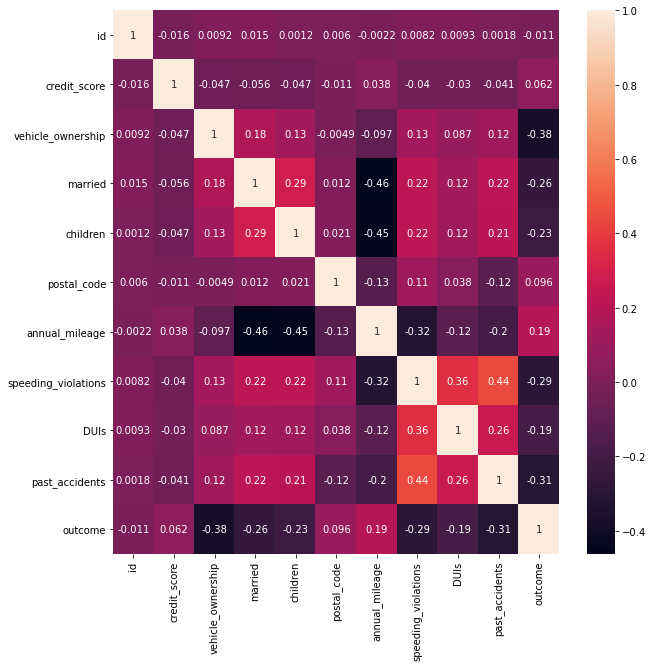

In [108]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

In [109]:
##Splitting the data to serve to a model

In [110]:
from sklearn.model_selection import train_test_split

In [111]:
X = df_new.drop('outcome',axis=1)
y = df_new['outcome']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [112]:
##Fitting data to model and predicting the results

In [113]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score

In [114]:
Gb = GradientBoostingClassifier(learning_rate=0.1,n_estimators=150)

Gb.fit(X_train,y_train)

y_predicted = Gb.predict(X_test)

In [115]:
##We detect the classification report accuracy,precision and recall as confusion matrix

In [116]:
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

         0.0       0.90      0.89      0.90      2109
         1.0       0.75      0.77      0.76       891

    accuracy                           0.85      3000
   macro avg       0.82      0.83      0.83      3000
weighted avg       0.86      0.85      0.86      3000



In [117]:
print('Accuracy Score:',accuracy_score(y_test,y_predicted))
print('precision Score:',precision_score(y_test,y_predicted))
print('recall Score:',recall_score(y_test,y_predicted))    

Accuracy Score: 0.855
precision Score: 0.7467532467532467
recall Score: 0.7744107744107744


Gb is object of Gradient Boost Classifier. The upcoming testing data that should be an array of 
customer's featurewise properties and when predict that array using Gb object resultant it return 1 or 0 as class of customer 